In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
#Utility Functions 

def loadData():
    return pd.read_csv("./Data/advanced_housing.csv")

def getAttr(df):
    return df.columns


# Predictions with only numerical attributes

In [3]:
df = loadData()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


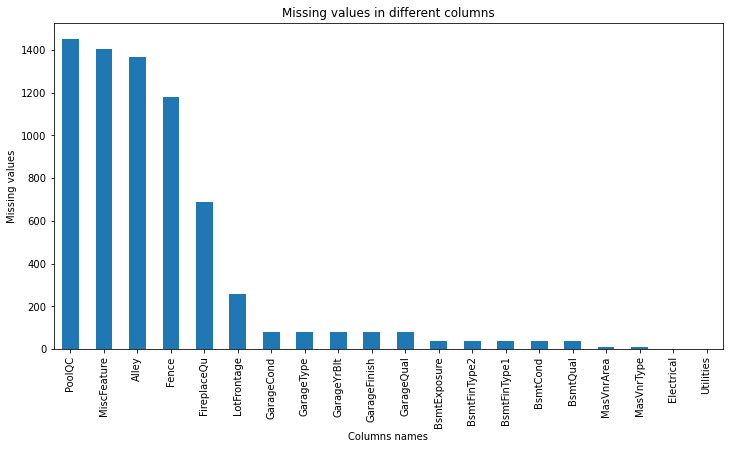

In [5]:
plt.figure(figsize=(12,6))
plt.title("Missing values in different columns")
plt.ylabel("Missing values")
plt.xlabel("Columns names")
df.isnull().sum().sort_values(ascending=False)[:20].plot(kind='bar')

In [6]:
columns=getAttr(df)
for i in columns:
    print(i, end=",  ")
print("\n\n")
print("Total attributes in the data : ",len(columns))

Id,  MSSubClass,  MSZoning,  LotFrontage,  LotArea,  Street,  Alley,  LotShape,  LandContour,  Utilities,  LotConfig,  LandSlope,  Neighborhood,  Condition1,  Condition2,  BldgType,  HouseStyle,  OverallQual,  OverallCond,  YearBuilt,  YearRemodAdd,  RoofStyle,  RoofMatl,  Exterior1st,  Exterior2nd,  MasVnrType,  MasVnrArea,  ExterQual,  ExterCond,  Foundation,  BsmtQual,  BsmtCond,  BsmtExposure,  BsmtFinType1,  BsmtFinSF1,  BsmtFinType2,  BsmtFinSF2,  BsmtUnfSF,  TotalBsmtSF,  Heating,  HeatingQC,  CentralAir,  Electrical,  1stFlrSF,  2ndFlrSF,  LowQualFinSF,  GrLivArea,  BsmtFullBath,  BsmtHalfBath,  FullBath,  HalfBath,  BedroomAbvGr,  KitchenAbvGr,  KitchenQual,  TotRmsAbvGrd,  Functional,  Fireplaces,  FireplaceQu,  GarageType,  GarageYrBlt,  GarageFinish,  GarageCars,  GarageArea,  GarageQual,  GarageCond,  PavedDrive,  WoodDeckSF,  OpenPorchSF,  EnclosedPorch,  3SsnPorch,  ScreenPorch,  PoolArea,  PoolQC,  Fence,  MiscFeature,  MiscVal,  MoSold,  YrSold,  SaleType,  SaleConditi

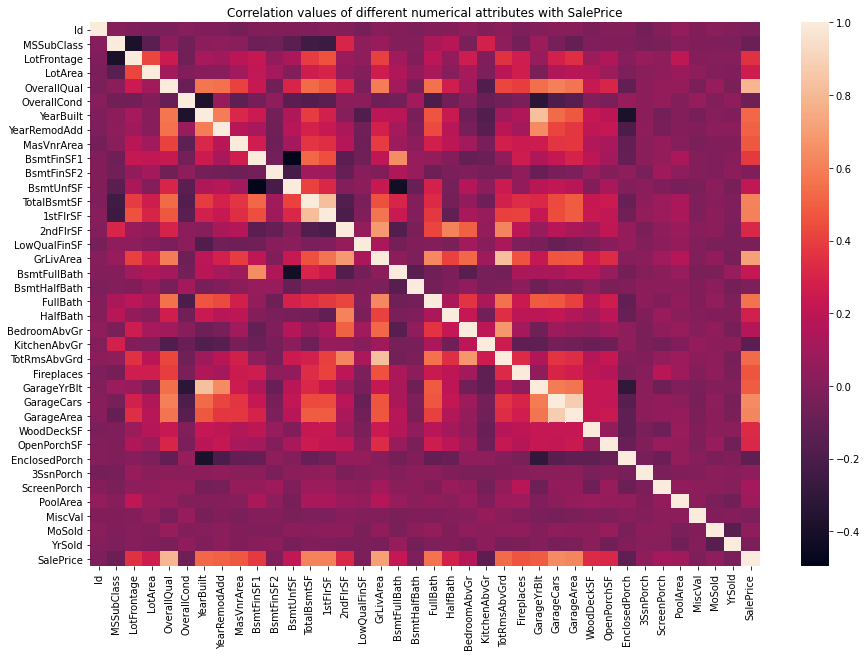

In [7]:
plt.figure(figsize=(15,10))
plt.title("Correlation values of different numerical attributes with SalePrice")
sns.heatmap(df.corr())

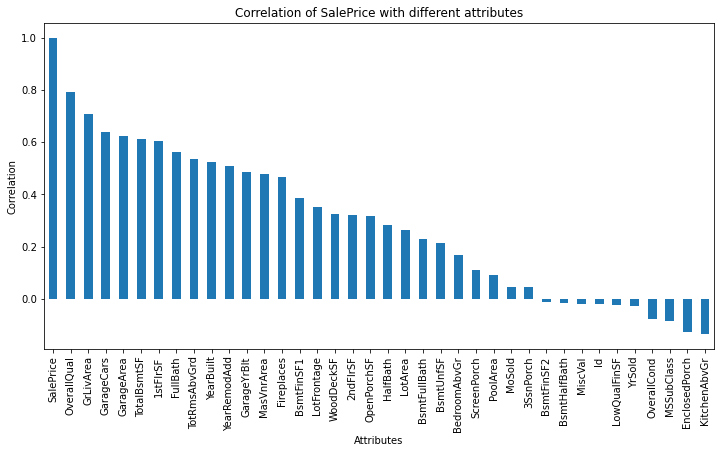

In [8]:
plt.figure(figsize=(12,6))
plt.title("Correlation of SalePrice with different attributes")
plt.xlabel('Attributes')
plt.ylabel('Correlation')
df.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')

In [9]:
corr_series = df.corr()['SalePrice']
attr_tobe_drop = []
numerical_attr=[]
# Attributes having least correlation with target attribute i.e. SalePrice
for i in corr_series.sort_values(ascending=False).keys():
    if corr_series[i]<0.5:
        print(f" {i} ==> {corr_series[i]}")
        attr_tobe_drop.append(i)
    else:
        numerical_attr.append(i)

 GarageYrBlt ==> 0.48636167748786213
 MasVnrArea ==> 0.4774930470957107
 Fireplaces ==> 0.4669288367515242
 BsmtFinSF1 ==> 0.38641980624215627
 LotFrontage ==> 0.35179909657067854
 WoodDeckSF ==> 0.32441344456813076
 2ndFlrSF ==> 0.31933380283206614
 OpenPorchSF ==> 0.31585622711605577
 HalfBath ==> 0.2841076755947784
 LotArea ==> 0.2638433538714063
 BsmtFullBath ==> 0.22712223313149718
 BsmtUnfSF ==> 0.214479105546969
 BedroomAbvGr ==> 0.1682131543007415
 ScreenPorch ==> 0.11144657114291048
 PoolArea ==> 0.09240354949187278
 MoSold ==> 0.04643224522381936
 3SsnPorch ==> 0.04458366533574792
 BsmtFinSF2 ==> -0.011378121450215216
 BsmtHalfBath ==> -0.016844154297359294
 MiscVal ==> -0.02118957964030379
 Id ==> -0.021916719443431112
 LowQualFinSF ==> -0.02560613000068015
 YrSold ==> -0.028922585168730426
 OverallCond ==> -0.0778558940486776
 MSSubClass ==> -0.08428413512659523
 EnclosedPorch ==> -0.12857795792595636
 KitchenAbvGr ==> -0.1359073708421417


In [10]:
# we will drop the attributes having correlations below threshold of 0.5
# with respect to salePrice
df.drop(attr_tobe_drop, axis=1, inplace=True)

In [11]:
# Here we will drop the categorical attributes 
columns = getAttr(df)
for i in columns:
    if i not in numerical_attr:
        df.drop([i], axis=1, inplace =True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('SalePrice', axis=1).values
y=df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1 with no dropout and early stopping

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# model1 with only numerical data and no dropout and early stopping
model1 = Sequential()

model1.add(Dense(11, activation = 'relu'))
model1.add(Dense(11, activation = 'relu'))
model1.add(Dense(11, activation = 'relu'))
model1.add(Dense(1))
          
model1.compile(loss='mse', optimizer='adam')

In [18]:
model1.fit(x=X_train,y=y_train,epochs=300, validation_data=(X_test,y_test), batch_size=128)

Epoch 1/300
8/8 [==============================] - 4s 338ms/step - loss: 37980971918.2222 - val_loss: 38446854144.0000
Epoch 2/300
8/8 [==============================] - 0s 13ms/step - loss: 38873746545.7778 - val_loss: 38446669824.0000
Epoch 3/300
8/8 [==============================] - 0s 12ms/step - loss: 39639288035.5556 - val_loss: 38446473216.0000
Epoch 4/300
8/8 [==============================] - 0s 13ms/step - loss: 39263704405.3333 - val_loss: 38446256128.0000
Epoch 5/300
8/8 [==============================] - 0s 12ms/step - loss: 38767182279.1111 - val_loss: 38446014464.0000
Epoch 6/300
8/8 [==============================] - 0s 14ms/step - loss: 39681802695.1111 - val_loss: 38445748224.0000
Epoch 7/300
8/8 [==============================] - 0s 15ms/step - loss: 38559536469.3333 - val_loss: 38445449216.0000
Epoch 8/300
8/8 [==============================] - 0s 12ms/step - loss: 40774431630.2222 - val_loss: 38445113344.0000
Epoch 9/300
8/8 [==============================] - ETA:

8/8 [==============================] - 0s 17ms/step - loss: 37784523662.2222 - val_loss: 37290250240.0000
Epoch 70/300
8/8 [==============================] - 0s 18ms/step - loss: 38012433749.3333 - val_loss: 37222629376.0000
Epoch 71/300
8/8 [==============================] - 0s 17ms/step - loss: 38669615104.0000 - val_loss: 37151846400.0000
Epoch 72/300
8/8 [==============================] - 0s 20ms/step - loss: 39348278158.2222 - val_loss: 37078519808.0000
Epoch 73/300
8/8 [==============================] - 0s 19ms/step - loss: 36577751040.0000 - val_loss: 37002764288.0000
Epoch 74/300
8/8 [==============================] - 0s 18ms/step - loss: 37269521749.3333 - val_loss: 36923457536.0000
Epoch 75/300
8/8 [==============================] - 0s 18ms/step - loss: 37803888640.0000 - val_loss: 36840955904.0000
Epoch 76/300
8/8 [==============================] - 0s 17ms/step - loss: 36681549141.3333 - val_loss: 36755922944.0000
Epoch 77/300
8/8 [==============================] - 0s 17ms/s

8/8 [==============================] - 0s 8ms/step - loss: 24573401543.1111 - val_loss: 23675262976.0000
Epoch 138/300
8/8 [==============================] - 0s 8ms/step - loss: 23122277489.7778 - val_loss: 23345045504.0000
Epoch 139/300
8/8 [==============================] - 0s 8ms/step - loss: 23425140053.3333 - val_loss: 23007944704.0000
Epoch 140/300
8/8 [==============================] - 0s 11ms/step - loss: 23744320170.6667 - val_loss: 22669662208.0000
Epoch 141/300
8/8 [==============================] - 0s 12ms/step - loss: 22613994837.3333 - val_loss: 22330261504.0000
Epoch 142/300
8/8 [==============================] - 0s 13ms/step - loss: 22043811157.3333 - val_loss: 21990889472.0000
Epoch 143/300
8/8 [==============================] - 0s 16ms/step - loss: 22288391964.4444 - val_loss: 21646893056.0000
Epoch 144/300
8/8 [==============================] - 0s 16ms/step - loss: 21577670200.8889 - val_loss: 21303881728.0000
Epoch 145/300
8/8 [==============================] - 0s 1

Epoch 206/300
8/8 [==============================] - 0s 12ms/step - loss: 4490881735.1111 - val_loss: 4568281088.0000
Epoch 207/300
8/8 [==============================] - 0s 15ms/step - loss: 4381017031.1111 - val_loss: 4451132928.0000
Epoch 208/300
8/8 [==============================] - 0s 12ms/step - loss: 4396521415.1111 - val_loss: 4338811904.0000
Epoch 209/300
8/8 [==============================] - 0s 13ms/step - loss: 4365256675.5556 - val_loss: 4231358464.0000
Epoch 210/300
8/8 [==============================] - 0s 15ms/step - loss: 3834233258.6667 - val_loss: 4129563136.0000
Epoch 211/300
8/8 [==============================] - 0s 15ms/step - loss: 3961720064.0000 - val_loss: 4033217792.0000
Epoch 212/300
8/8 [==============================] - 0s 12ms/step - loss: 3446214058.6667 - val_loss: 3941280768.0000
Epoch 213/300
8/8 [==============================] - 0s 12ms/step - loss: 3678761756.4444 - val_loss: 3852761600.0000
Epoch 214/300
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 16ms/step - loss: 2170545536.0000 - val_loss: 2570273792.0000
Epoch 276/300
8/8 [==============================] - 0s 16ms/step - loss: 2507738055.1111 - val_loss: 2569847296.0000
Epoch 277/300
8/8 [==============================] - 0s 14ms/step - loss: 2377880632.8889 - val_loss: 2569399040.0000
Epoch 278/300
8/8 [==============================] - 0s 12ms/step - loss: 2122905500.4444 - val_loss: 2569047040.0000
Epoch 279/300
8/8 [==============================] - 0s 12ms/step - loss: 1902038001.7778 - val_loss: 2568690176.0000
Epoch 280/300
8/8 [==============================] - 0s 16ms/step - loss: 2277231943.1111 - val_loss: 2568309760.0000
Epoch 281/300
8/8 [==============================] - 0s 15ms/step - loss: 2705773169.7778 - val_loss: 2567961088.0000
Epoch 282/300
8/8 [==============================] - 0s 12ms/step - loss: 2514141269.3333 - val_loss: 2567655168.0000
Epoch 283/300
8/8 [==============================] - 0s 12ms/step - lo

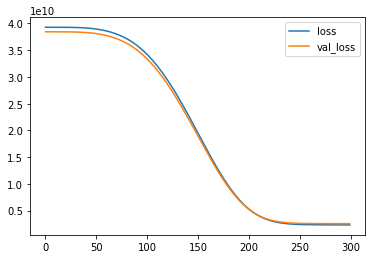

In [19]:
pd.DataFrame(model1.history.history).plot()

In [29]:
predictions1  = model1.predict(X_test)

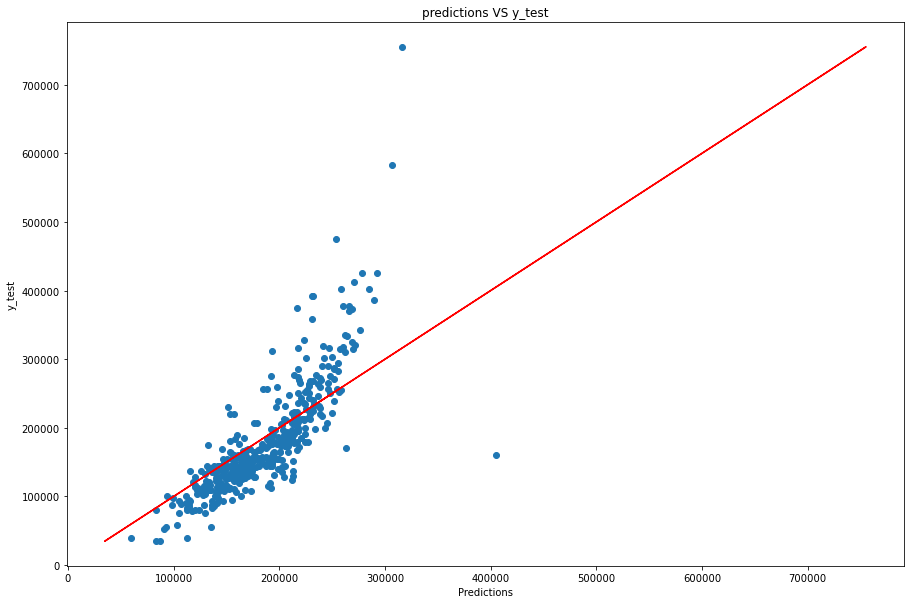

In [30]:
plt.figure(figsize=(15,10))
plt.title("predictions VS y_test")
plt.xlabel("Predictions")
plt.ylabel("y_test")
plt.scatter(predictions1,y_test)
plt.plot(y_test,y_test,'r')

In [22]:
single_house = scaler.transform(df.drop('SalePrice', axis=1).iloc[0].values.reshape(-1,10))

In [23]:
predPrice = model1.predict(single_house)[0,0]
actualPrice = df.iloc[0]['SalePrice']
print(f"Predicted price ${predPrice}")
print(f"Actual price ${actualPrice}")
print(f"We are off by  ${abs(predPrice-actualPrice)}")

Predicted price $217539.140625
Actual price $208500
We are off by  $9039.140625


In [24]:
model1.save('onlyNumAttr1.h5')

In [25]:
# to use saved model
from tensorflow.keras.models import load_model
later_model1 = load_model("./onlyNumAttr1.h5")

In [26]:
print(later_model1.predict(single_house)[0][0])

217539.14


## Model2 with Early stopping and Dropout layers

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience =15)

In [40]:
model2 = Sequential()

model2.add(Dense(11, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(11, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(11, activation = 'relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

In [41]:
model2.fit(x=X_train, y=y_train, epochs = 300, 
           validation_data=(X_test, y_test), batch_size=128,
          callbacks=[early_stop])

Epoch 1/300
8/8 [==============================] - 1s 50ms/step - loss: 37794530190.2222 - val_loss: 38447505408.0000
Epoch 2/300
8/8 [==============================] - 0s 13ms/step - loss: 38216480995.5556 - val_loss: 38447484928.0000
Epoch 3/300
8/8 [==============================] - 0s 13ms/step - loss: 39363467946.6667 - val_loss: 38447460352.0000
Epoch 4/300
8/8 [==============================] - 0s 12ms/step - loss: 40835734641.7778 - val_loss: 38447439872.0000
Epoch 5/300
8/8 [==============================] - 0s 13ms/step - loss: 37762978474.6667 - val_loss: 38447407104.0000
Epoch 6/300
8/8 [==============================] - 0s 12ms/step - loss: 40266731064.8889 - val_loss: 38447357952.0000
Epoch 7/300
8/8 [==============================] - 0s 12ms/step - loss: 39396911786.6667 - val_loss: 38447296512.0000
Epoch 8/300
8/8 [==============================] - 0s 12ms/step - loss: 39161015864.8889 - val_loss: 38447218688.0000
Epoch 9/300
8/8 [==============================] - 0s 13

Epoch 70/300
8/8 [==============================] - 0s 12ms/step - loss: 38408354474.6667 - val_loss: 35688886272.0000
Epoch 71/300
8/8 [==============================] - 0s 12ms/step - loss: 36507333518.2222 - val_loss: 35508400128.0000
Epoch 72/300
8/8 [==============================] - 0s 12ms/step - loss: 36381855971.5556 - val_loss: 35316752384.0000
Epoch 73/300
8/8 [==============================] - 0s 12ms/step - loss: 35148027221.3333 - val_loss: 35121983488.0000
Epoch 74/300
8/8 [==============================] - 0s 13ms/step - loss: 36620884195.5556 - val_loss: 34916556800.0000
Epoch 75/300
8/8 [==============================] - 0s 13ms/step - loss: 36330373120.0000 - val_loss: 34701795328.0000
Epoch 76/300
8/8 [==============================] - 0s 15ms/step - loss: 35602192156.4444 - val_loss: 34478891008.0000
Epoch 77/300
8/8 [==============================] - 0s 13ms/step - loss: 34730823224.8889 - val_loss: 34250330112.0000
Epoch 78/300
8/8 [==============================

8/8 [==============================] - 0s 12ms/step - loss: 12012809102.2222 - val_loss: 10068654080.0000
Epoch 139/300
8/8 [==============================] - 0s 13ms/step - loss: 13087100245.3333 - val_loss: 9733381120.0000
Epoch 140/300
8/8 [==============================] - 0s 13ms/step - loss: 12090972387.5556 - val_loss: 9416891392.0000
Epoch 141/300
8/8 [==============================] - 0s 12ms/step - loss: 12222496540.4444 - val_loss: 9114791936.0000
Epoch 142/300
8/8 [==============================] - 0s 12ms/step - loss: 11899821966.2222 - val_loss: 8821030912.0000
Epoch 143/300
8/8 [==============================] - 0s 12ms/step - loss: 11483359232.0000 - val_loss: 8540353024.0000
Epoch 144/300
8/8 [==============================] - 0s 12ms/step - loss: 11966322801.7778 - val_loss: 8273357824.0000
Epoch 145/300
8/8 [==============================] - 0s 12ms/step - loss: 12356088376.8889 - val_loss: 8021318144.0000
Epoch 146/300
8/8 [==============================] - 0s 12ms/

8/8 [==============================] - 0s 15ms/step - loss: 8475253248.0000 - val_loss: 3721517056.0000
Epoch 208/300
8/8 [==============================] - 0s 14ms/step - loss: 8975438563.5556 - val_loss: 3711024896.0000
Epoch 209/300
8/8 [==============================] - 0s 14ms/step - loss: 9420893184.0000 - val_loss: 3706008064.0000
Epoch 210/300
8/8 [==============================] - 0s 14ms/step - loss: 9406538865.7778 - val_loss: 3708442368.0000
Epoch 211/300
8/8 [==============================] - 0s 13ms/step - loss: 8386812700.4444 - val_loss: 3718855168.0000
Epoch 212/300
8/8 [==============================] - 0s 12ms/step - loss: 8876870656.0000 - val_loss: 3713258496.0000
Epoch 213/300
8/8 [==============================] - 0s 12ms/step - loss: 8893392384.0000 - val_loss: 3693424640.0000
Epoch 214/300
8/8 [==============================] - 0s 13ms/step - loss: 8663166520.8889 - val_loss: 3682873600.0000
Epoch 215/300
8/8 [==============================] - 0s 12ms/step - lo

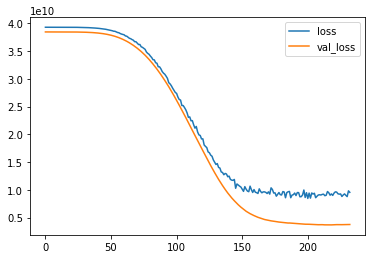

In [42]:
pd.DataFrame(model2.history.history).plot()

In [43]:
single_house = scaler.transform(df.drop('SalePrice', axis=1).iloc[0].values.reshape(-1,10))

In [44]:
predPrice = model2.predict(single_house)[0,0]
actualPrice = df.iloc[0]['SalePrice']
print(f"Predicted price ${predPrice}")
print(f"Actual price ${actualPrice}")
print(f"We are off by  ${abs(predPrice-actualPrice)}")

Predicted price $176525.28125
Actual price $208500
We are off by  $31974.71875


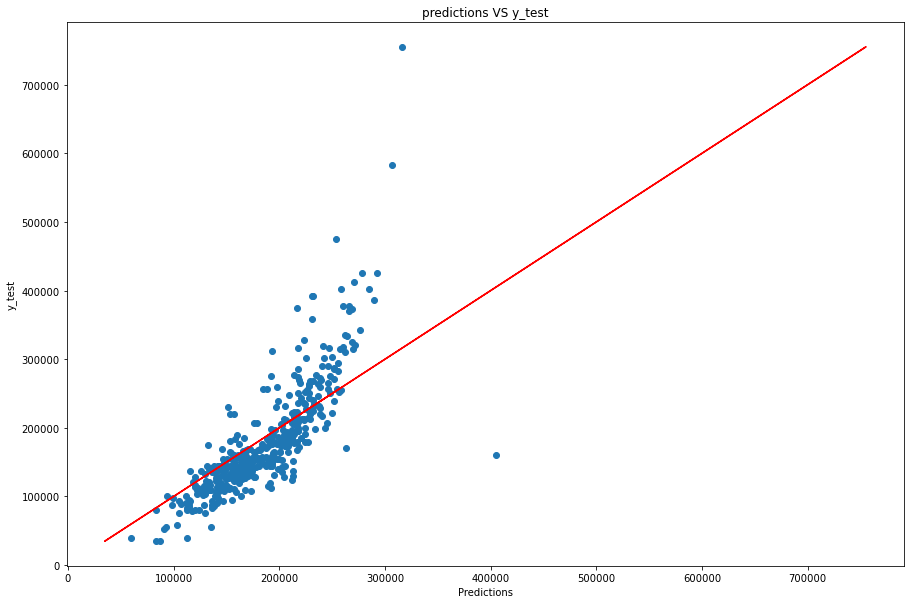

In [45]:
predictions2  = model1.predict(X_test)
plt.figure(figsize=(15,10))
plt.title("predictions VS y_test")
plt.xlabel("Predictions")
plt.ylabel("y_test")
plt.scatter(predictions2,y_test)
plt.plot(y_test,y_test,'r')

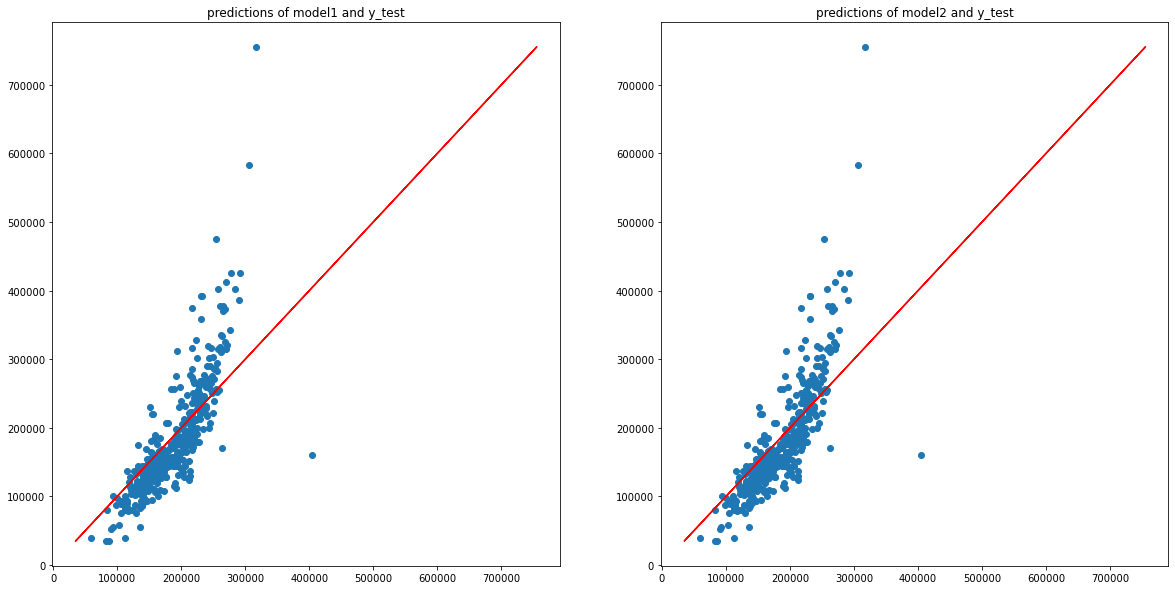

In [50]:
fig = plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(x=predictions1, y=y_test)
plt.plot(y_test,y_test,'r')
plt.title("predictions of model1 and y_test")

plt.subplot(122)
plt.scatter(x=predictions2, y=y_test)
plt.plot(y_test,y_test,'r')
plt.title("predictions of model2 and y_test")

plt.show()

In [ ]:
model2.save("")